In [1]:
from dask.distributed import Client

client = Client()

In [2]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 1.41 ms, sys: 4.35 ms, total: 5.77 ms
Wall time: 3 s


In [4]:
%%time

from dask import delayed

# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)


CPU times: user 188 µs, sys: 1.1 ms, total: 1.29 ms
Wall time: 1.14 ms


In [5]:
%%time

z.compute()

CPU times: user 84.1 ms, sys: 40.1 ms, total: 124 ms
Wall time: 2.14 s


5

In [6]:

data = [1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)
   
total = sum(results)
print("Before computing:", total)

Before computing: 44
CPU times: user 8.71 ms, sys: 6.35 ms, total: 15.1 ms
Wall time: 8.01 s


In [8]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
   
total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-7d8d2c96-3782-4e3a-b45d-f48f62870586')
After computing : 44
CPU times: user 20 ms, sys: 6.85 ms, total: 26.8 ms
Wall time: 1.05 s


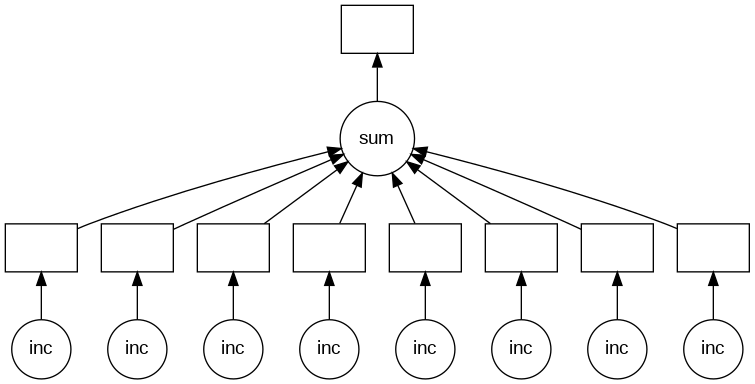

In [10]:
total.visualize()